In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
#Accessing data(tsv file)
df = pd.read_table('/content/Restaurant_Reviews (1).tsv')
df

FileNotFoundError: ignored

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
df.isnull().sum()

Review    0
Liked     0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


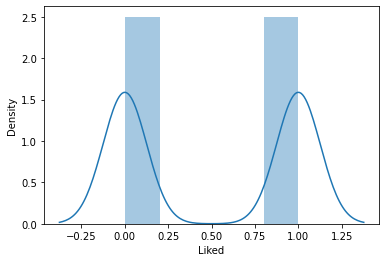

In [ ]:
# EDA(exploratory data analysis)
sns.distplot(df.Liked)
plt.show()

In [ ]:
# First using Count Vectorizer:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words = 'english')


In [ ]:
df = df.drop_duplicates(keep = 'last')
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [ ]:
df['Review'][990]

'The refried beans that came with my meal were dried out and crusty and the food was bland.'

In [ ]:
df['Liked'][990]

0

In [ ]:
df['Review'][97]

'Food arrived quickly!'

In [ ]:
df['Liked'][97]

1

In [ ]:
df['Liked'].value_counts()

1    499
0    497
Name: Liked, dtype: int64

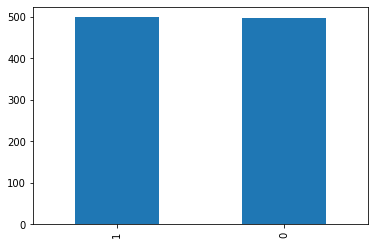

In [ ]:
df['Liked'].value_counts().plot(kind='bar')
plt.show()

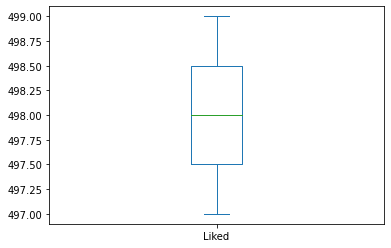

In [ ]:
df['Liked'].value_counts().plot(kind='box')
plt.show()

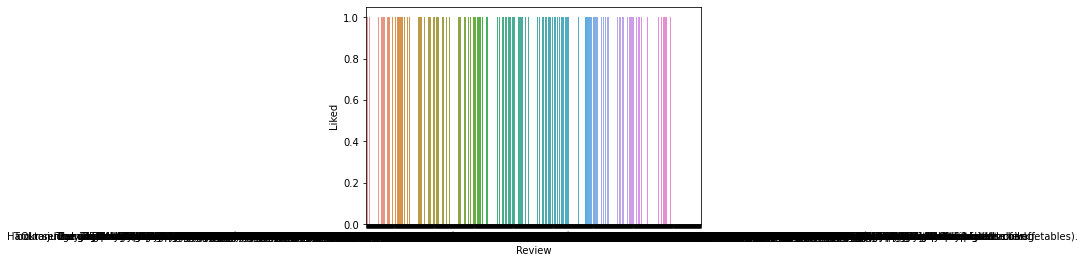

In [ ]:
#State Wise Review Analysis 
sns.barplot(x='Review',y='Liked',data=df)
plt.show()

In [ ]:
x = df['Review'].values
y = df['Liked'].values

In [ ]:
df.shape

(996, 2)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)


In [ ]:
x_train.shape

(747,)

In [ ]:
x_test.shape

(249,)

In [ ]:
vect = CountVectorizer(stop_words = 'english')
x_train_vect = vect.fit_transform(x_train)
x_test_vect = vect.transform(x_test)

In [ ]:
x_train_vect.toarray() # all text is converted into numerical values.

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
#METHOD 1:
from sklearn.svm import SVC  #from Support Vector Machine import support vector classifier
model = SVC()
model.fit(x_train_vect,y_train)

SVC()

In [ ]:
y_pred = model.predict(x_test_vect)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.7269076305220884

In [ ]:
#METHOD 2: Using Pipelines
# SVC + CountVectorizer
from sklearn.pipeline import make_pipeline
model2 = make_pipeline(CountVectorizer(),SVC())

In [ ]:
model2.fit(x_train,y_train)
y_pred2 = model2.predict(x_test)
y_pred2

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1])

In [ ]:
accuracy_score(y_pred2,y_test)

0.8152610441767069

In [ ]:
#METHOD 3: using NAIVE BAYES
from sklearn.naive_bayes import MultinomialNB
model3 = MultinomialNB()

In [ ]:
model3.fit(x_train_vect,y_train)

MultinomialNB()

In [ ]:
y_pred3 = model3.predict(x_test_vect)
y_pred3

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1])

In [ ]:
accuracy_score(y_pred3,y_test)

0.7469879518072289

In [ ]:
# METHOD 4: NB + CountVectorizer
from sklearn.pipeline import make_pipeline
model4 = make_pipeline(CountVectorizer(),MultinomialNB())

In [ ]:
model4.fit(x_train,y_train)
y_pred4 = model4.predict(x_test)
y_pred4

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1])

In [ ]:
accuracy_score(y_pred4,y_test)

0.7791164658634538

In [ ]:
# Using Tf-idf Vectorizer which is more advance than CountVectorizer!
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = 'english')


In [ ]:
# How to handle data(using Tf-idf Vectorizer) 
# NATURAL LANGUAGE PROCESSING
s = ['Excellent customer service. (EN) was very friendly, patient and helpful in helping us find what we were looking for.',
 'Excellent customer service from (EN)!! He helped clarify many questions I had regarding (Service)!']


In [ ]:
op = tfidf.fit_transform(s).toarray()
op

array([[0.        , 0.26844636, 0.26844636, 0.26844636, 0.37729199,
        0.        , 0.37729199, 0.37729199, 0.37729199, 0.37729199,
        0.        , 0.        , 0.26844636],
       [0.36408901, 0.25905233, 0.25905233, 0.25905233, 0.        ,
        0.36408901, 0.        , 0.        , 0.        , 0.        ,
        0.36408901, 0.36408901, 0.51810466]])

In [ ]:
print(len(tfidf.vocabulary_))

13


In [ ]:
tfidf.vocabulary_

{'clarify': 0,
 'customer': 1,
 'en': 2,
 'excellent': 3,
 'friendly': 4,
 'helped': 5,
 'helpful': 6,
 'helping': 7,
 'looking': 8,
 'patient': 9,
 'questions': 10,
 'regarding': 11,
 'service': 12}

In [ ]:
feature_names = tfidf.get_feature_names()
for col in op.nonzero()[1]:
  print(feature_names[col], ' - ', op[0, col])

customer  -  0.26844635592575894
en  -  0.26844635592575894
excellent  -  0.26844635592575894
friendly  -  0.3772919866524395
helpful  -  0.3772919866524395
helping  -  0.3772919866524395
looking  -  0.3772919866524395
patient  -  0.3772919866524395
service  -  0.26844635592575894
clarify  -  0.0
customer  -  0.26844635592575894
en  -  0.26844635592575894
excellent  -  0.26844635592575894
helped  -  0.0
questions  -  0.0
regarding  -  0.0
service  -  0.26844635592575894


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Moving further on given data set!
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  996 non-null    object
 1   Liked   996 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 55.6+ KB


In [ ]:
df = df.drop_duplicates(keep = 'last')   #To remove all duplicate Reviews from dataframe.
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [ ]:
df['Review'][990]

'The refried beans that came with my meal were dried out and crusty and the food was bland.'

In [ ]:
df['Liked'][990]

0

In [ ]:
df['Review'][97]


'Food arrived quickly!'

In [ ]:
df['Liked'][97]

1

In [ ]:
df['Liked'].value_counts()


1    499
0    497
Name: Liked, dtype: int64

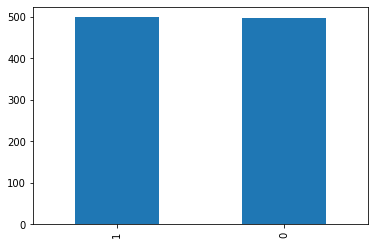

In [ ]:
df['Liked'].value_counts().plot(kind='bar')
plt.show()


In [ ]:
x = df['Review'].values
y = df['Liked'].values

In [ ]:
df.shape

(996, 2)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)


In [ ]:
x_train.shape

(747,)

In [ ]:
x_test.shape

(249,)

In [ ]:
tfidf = TfidfVectorizer(stop_words = 'english')
x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf = tfidf.transform(x_test)


In [ ]:
x_train_tfidf.toarray() # all text is converted into numerical values.

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#METHOD 1:
from sklearn.svm import SVC  #from Support Vector Machine import support vector classifier
model = SVC()
model.fit(x_train_tfidf,y_train)



SVC()

In [ ]:
y_pred = model.predict(x_test_tfidf)
y_pred

array([0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)


0.7309236947791165

In [ ]:
#METHOD 2: Using Pipelines
# SVC + TfidfVectorizer
from sklearn.pipeline import make_pipeline
model2 = make_pipeline(TfidfVectorizer(),SVC())


In [ ]:
model2.fit(x_train,y_train)
y_pred2 = model2.predict(x_test)
y_pred2

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1])

In [ ]:
accuracy_score(y_pred2,y_test)

0.8192771084337349

In [ ]:
#METHOD 3: using NAIVE BAYES
from sklearn.naive_bayes import MultinomialNB
model3 = MultinomialNB()

In [ ]:
model3.fit(x_train_tfidf,y_train)


MultinomialNB()

In [ ]:
y_pred3 = model3.predict(x_test_tfidf)
y_pred3

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1])

In [ ]:
accuracy_score(y_pred3,y_test)

0.7389558232931727

In [ ]:
# METHOD 4: NB + TfidfVectorizer
from sklearn.pipeline import make_pipeline
model4 = make_pipeline(TfidfVectorizer(),MultinomialNB())

In [ ]:
model4.fit(x_train,y_train)
y_pred4 = model4.predict(x_test)
y_pred4

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1])

In [ ]:
accuracy_score(y_pred4,y_test)

0.7831325301204819

In [ ]:
# WEBAPP using the model
import joblib
joblib.dump(model2,'Sentiment-Analysis')


['Sentiment-Analysis']

In [ ]:
import joblib
reload_model = joblib.load('Sentiment-Analysis')

In [ ]:
reload_model.predict(['worst'])

array([0])

In [ ]:
reload_model.predict(['good'])

array([1])

In [ ]:
# TfidfVectorizer is used to create the model as it gave more accuracy than CountVectorizer!
# model2(SVC+TfidfVectorizer) model is used to create the app as it gave highest accuracy(0.8192771084337349) among all other model* 
#Creating webapp using STREAMLIT
!pip install streamlit --quiet

     |████████████████████████████████| 10.1 MB 5.2 MB/s 
     |████████████████████████████████| 164 kB 57.6 MB/s 
     |████████████████████████████████| 4.3 MB 36.3 MB/s 
     |████████████████████████████████| 181 kB 46.0 MB/s 
     |████████████████████████████████| 111 kB 51.7 MB/s 
     |████████████████████████████████| 77 kB 4.8 MB/s 
     |████████████████████████████████| 63 kB 1.3 MB/s 
     |████████████████████████████████| 131 kB 39.9 MB/s 
     |████████████████████████████████| 130 kB 69.7 MB/s 
     |████████████████████████████████| 428 kB 70.8 MB/s 
     |████████████████████████████████| 793 kB 46.0 MB/s 
     |████████████████████████████████| 381 kB 72.4 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.29 which is incompatible.
google-colab 1

In [ ]:
%%writefile app.py
import streamlit as st
import joblib
st.title("SENTIMENT ANALYSIS")
reload_model = joblib.load('Sentiment-Analysis')
ip = st.text_input("Enter the REVIEW: ") #Getting user input
op = reload_model.predict([ip])[0]
dict = {0 :'Negative', 1 : 'Positive'}
if st.button('PREDICT'):
  st.title(dict[op])


Overwriting app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501


2022-05-18 14:11:11.110 INFO    numexpr.utils: NumExpr defaulting to 2 threads.
npx: installed 22 in 4.557s
your url is: https://sharp-years-listen-35-237-209-209.loca.lt

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.237.209.209:8501

  Stopping...
^C
